In [1]:
from physionet2023.dataProcessing.datasets import SampleDataset
import seaborn as sns

In [2]:
ds = SampleDataset("./data", sample_len=1000, shuffle=True)

eeg_data, static_data, label = ds[0]
print(eeg_data.shape)
print(static_data.shape)
print(label)

torch.Size([18, 10000])
torch.Size([6])
tensor(3.)


<AxesSubplot:>

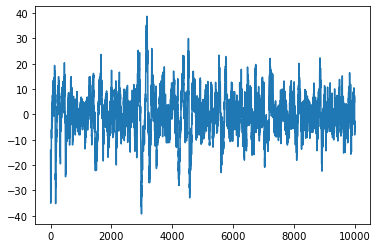

In [3]:
# Plot one of the 18 available EEG channels
sns.lineplot(x=range(0, eeg_data.shape[-1]), y=eeg_data[0,:])

In [4]:
# Demo using the dataloader with the built-in collate function
import torch

DL_DEMO_LIMIT = 3

dl = torch.utils.data.DataLoader(
    ds,
    num_workers=2,
    batch_size=4,
    collate_fn=ds.collate,
    pin_memory=True,
)

for batchnum, (X, Y) in enumerate(dl):
    print(f"Batch number: {batchnum}")
    print(f"X shape: {X.shape}")
    print(f"Y: {Y}")

    if batchnum == DL_DEMO_LIMIT:
        break


Batch number: 0
X shape: torch.Size([4, 24, 10000])
Y: tensor([3., 1., 5., 5.])
Batch number: 1
X shape: torch.Size([4, 24, 10000])
Y: tensor([5., 5., 1., 1.])
Batch number: 2
X shape: torch.Size([4, 24, 10000])
Y: tensor([5., 5., 4., 5.])
Batch number: 3
X shape: torch.Size([4, 24, 10000])
Y: tensor([2., 5., 5., 5.])
